<a href="https://colab.research.google.com/github/patriani/RNN_LSTM_Tesla_stock/blob/main/ELT575_Semana3_ES119663.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import pandas as pd

# Primeira configuração da rede
- **Modelo**: RNN configurado com apenas uma célula de LSTM, que por sua vez possui 50 unidades ocultas.
- **Análise**: O modelo representa um erro médio muito pequeno em comparação com a magnitude e a variação dos preços de fechamento (coluna 'Close' do dataset) observados. Nota-se que apesar de os erros (RMSE) serem muito baixos, observa-se que o poder de generalização do modelo pode não ser tão escalável devido o fato do erro de treino ter sido aproximadamente 100 vezes menor que o de teste.

  - **Raíz do Erro Médio Quadrático para Treino: 0.008**
  - **Raíz do Erro Médio Quadrático para Teste: 0.108**

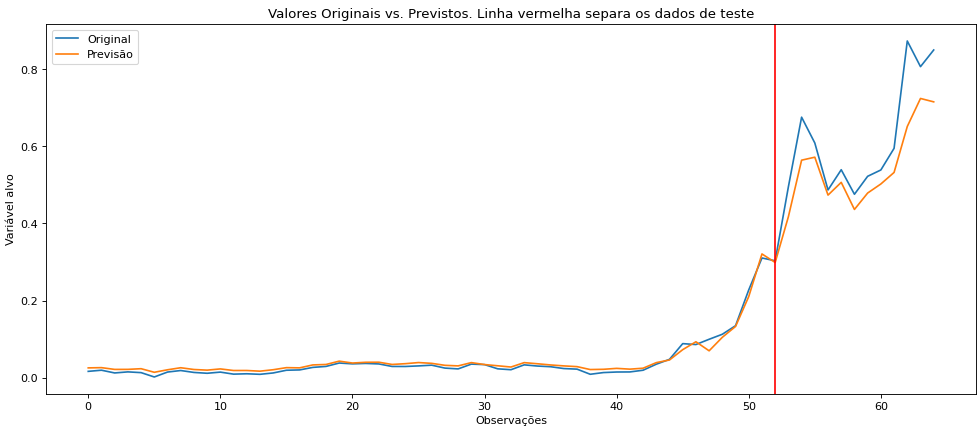


In [2]:
scaler = MinMaxScaler(feature_range=(0, 1))
def load_and_prepare_data():

  tesla_stock = 'https://raw.githubusercontent.com/patriani/RNN_LSTM_Tesla_stock/main/tesla_stock_2015_2022.csv'
  df = read_csv(tesla_stock)

  # Only the column 'Open' will be used as independent variables and 'Close' is the column of the dependent variables.
  df_XY=pd.DataFrame(df, columns=['Open','Close'])

  # Reshape of the target data
  df_XY_scaled = scaler.fit_transform(df_XY.values.reshape(-1, 1))

  # Split into train and test data (80% to train and 20% to test)
  train_size = int(len(df_XY_scaled) * 0.8)
  train_data = df_XY_scaled[:train_size]
  test_data = df_XY_scaled[train_size:]

  return df_XY,train_data,test_data

df_XY,train_data,test_data = load_and_prepare_data()

In [3]:
# Prepare the input X and target Y
def get_XY(data, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(data), time_steps)
    Y = data[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = data[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 50

# Prepating the train data frame
trainX, trainY = get_XY(train_data, time_steps)

# Prepating the test data frame
testX, testY = get_XY(test_data, time_steps)

In [4]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=32, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2/2 - 3s - 2s/step - loss: 0.0050 - val_loss: 0.3937
Epoch 2/20
2/2 - 1s - 359ms/step - loss: 0.0036 - val_loss: 0.3254
Epoch 3/20
2/2 - 0s - 71ms/step - loss: 0.0029 - val_loss: 0.2668
Epoch 4/20
2/2 - 0s - 64ms/step - loss: 0.0025 - val_loss: 0.2229
Epoch 5/20
2/2 - 0s - 67ms/step - loss: 0.0023 - val_loss: 0.1903
Epoch 6/20
2/2 - 0s - 73ms/step - loss: 0.0020 - val_loss: 0.1649
Epoch 7/20
2/2 - 0s - 41ms/step - loss: 0.0016 - val_loss: 0.1423
Epoch 8/20
2/2 - 0s - 71ms/step - loss: 0.0012 - val_loss: 0.1150
Epoch 9/20
2/2 - 0s - 39ms/step - loss: 9.1124e-04 - val_loss: 0.0890
Epoch 10/20
2/2 - 0s - 69ms/step - loss: 7.2961e-04 - val_loss: 0.0573
Epoch 11/20
2/2 - 0s - 41ms/step - loss: 4.1703e-04 - val_loss: 0.0282
Epoch 12/20
2/2 - 0s - 69ms/step - loss: 2.0984e-04 - val_loss: 0.0073
Epoch 13/20
2/2 - 0s - 42ms/step - loss: 8.2935e-05 - val_loss: 0.0045
Epoch 14/20
2/2 - 0s - 70ms/step - loss: 1.8646e-04 - val_loss: 0.0097
Epoch 15/20
2/2 - 0s - 40ms/step - loss: 2.4996e

In [5]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Raíz do Erro Médio Quadrático para Treino: 0.009
Raíz do Erro Médio Quadrático para Teste: 0.089


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


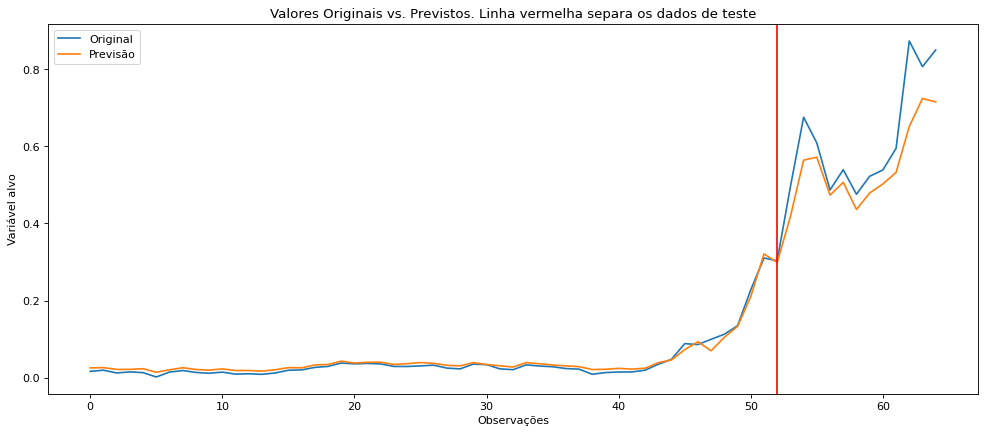

In [6]:
# predicting
predicted = model.predict(trainX)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(testY.reshape(-1, 1))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Variável alvo')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')

plot_result(trainY, testY, train_predict, test_predict)

# Segunda análise
- **Modelo**: baseado no primeiro experimento, com adição de uma camada LSTM
- **Análise**: A adição e conexão de uma camada LSTM já contribuiu levemente na generalização do modelo, assim como aumentou a precisão dele devido a redução do RMSE:
  - **Raíz do Erro Médio Quadrático para Treino: 0.007**
  - **Raíz do Erro Médio Quadrático para Teste: 0.090**

  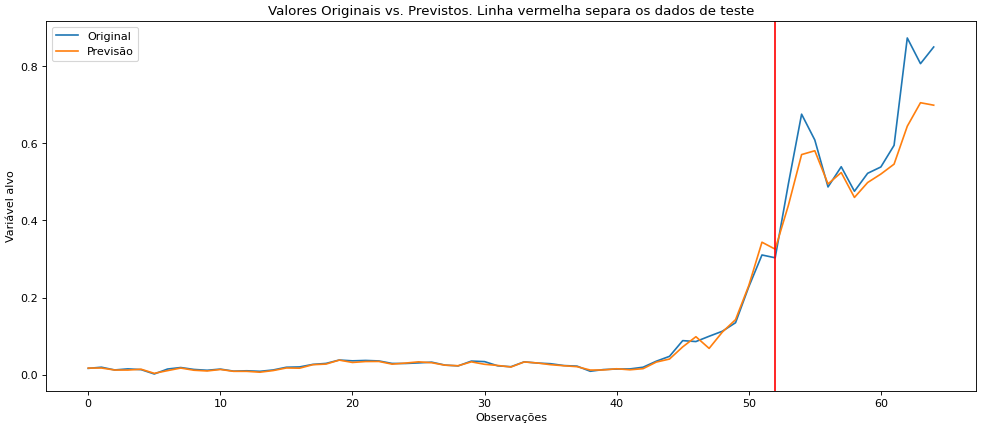

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 5s - 2s/step - loss: 0.0035 - val_loss: 0.1770
Epoch 2/20
2/2 - 1s - 726ms/step - loss: 0.0015 - val_loss: 0.0762
Epoch 3/20
2/2 - 0s - 108ms/step - loss: 0.0012 - val_loss: 0.0451
Epoch 4/20
2/2 - 0s - 113ms/step - loss: 5.1701e-04 - val_loss: 0.0259
Epoch 5/20
2/2 - 0s - 97ms/step - loss: 1.6575e-04 - val_loss: 0.0097
Epoch 6/20
2/2 - 0s - 45ms/step - loss: 2.6941e-04 - val_loss: 0.0044
Epoch 7/20
2/2 - 0s - 47ms/step - loss: 2.2075e-04 - val_loss: 0.0054
Epoch 8/20
2/2 - 0s - 48ms/step - loss: 2.9900e-04 - val_loss: 0.0049
Epoch 9/20
2/2 - 0s - 68ms/step - loss: 1.6417e-04 - val_loss: 0.0064
Epoch 10/20
2/2 - 0s - 50ms/step - loss: 6.7797e-05 - val_loss: 0.0169
Epoch 11/20
2/2 - 0s - 73ms/step - loss: 9.5879e-05 - val_loss: 0.0280
Epoch 12/20
2/2 - 0s - 47ms/step - loss: 1.7156e-04 - val_loss: 0.0323
Epoch 13/20
2/2 - 0s - 44ms/step - loss: 1.5701e-04 - val_loss: 0.0287
Epoch 14/20
2/2 - 0s - 66ms/step - loss: 1.2906e-04 - val_loss: 0.0238
Epoch 15/20
2/2 - 0s - 43ms/step - lo

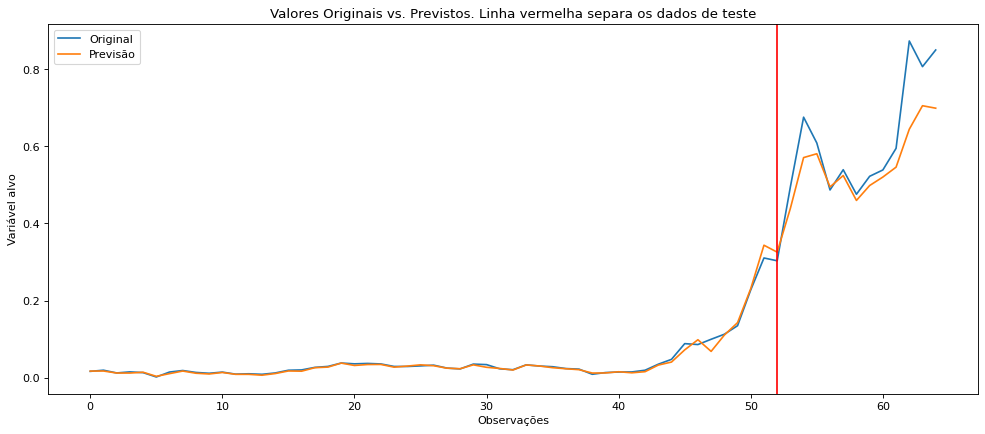

In [7]:

df_XY_02,train_data_02,test_data_02 = load_and_prepare_data()

# Same value of the previous test
time_steps = 50

# Prepating the train data frame
trainX_02, trainY_02 = get_XY(train_data_02, time_steps)

# Prepating the test data frame
testX_02, testY_02 = get_XY(test_data_02, time_steps)

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0],return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[1]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_02 = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model_02.fit(trainX_02, trainY_02, validation_data=(testX_02, testY_02), epochs=20, batch_size=32, verbose=2)


# make predictions
train_predict_02 = model_02.predict(trainX_02)
test_predict_02 = model_02.predict(testX_02)
# Mean square error
print_error(trainY_02, testY_02, train_predict_02, test_predict_02)


# predicting
predicted_02 = model_02.predict(trainX_02)
predicted_prices_02 = scaler.inverse_transform(predicted_02)
actual_prices_02 = scaler.inverse_transform(testY.reshape(-1, 1))

# Plot the result
plot_result(trainY_02, testY_02, train_predict_02, test_predict_02)

# Terceira análise
- **Modelo:** baseado no modelo anterior, tendo camadas de Dropout de 20% incluídas
- **Análise:** Observa-se que as métricas de erro não foram consideravelmente menores do que o exemplo anterior apresentou. Presumi-se que a técnica de dropout não contribui diretamente na melhora de performance de modelos pequenos, mas que é uma técnica promissora para redes mais profundas (com mais camdas), assim como será observado na próxima análise (quarta análise).
  - **Raíz do Erro Médio Quadrático para Treino: 0.008**
  -** Raíz do Erro Médio Quadrático para Teste: 0.085**

  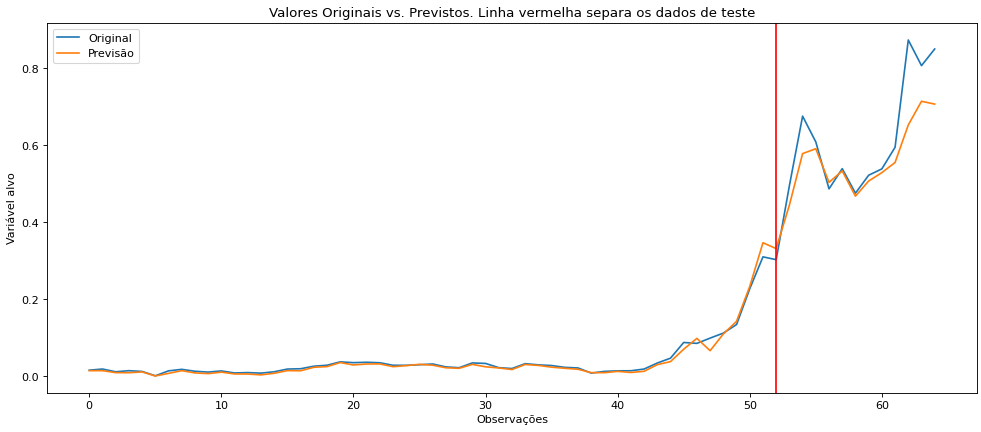


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 4s - 2s/step - loss: 0.0033 - val_loss: 0.2110
Epoch 2/20
2/2 - 0s - 83ms/step - loss: 0.0014 - val_loss: 0.1158
Epoch 3/20
2/2 - 0s - 77ms/step - loss: 0.0014 - val_loss: 0.0712
Epoch 4/20
2/2 - 0s - 77ms/step - loss: 0.0010 - val_loss: 0.0444
Epoch 5/20
2/2 - 0s - 73ms/step - loss: 2.4808e-04 - val_loss: 0.0256
Epoch 6/20
2/2 - 0s - 44ms/step - loss: 3.7813e-04 - val_loss: 0.0095
Epoch 7/20
2/2 - 0s - 74ms/step - loss: 3.2402e-04 - val_loss: 0.0049
Epoch 8/20
2/2 - 0s - 47ms/step - loss: 3.2000e-04 - val_loss: 0.0052
Epoch 9/20
2/2 - 0s - 69ms/step - loss: 3.1087e-04 - val_loss: 0.0053
Epoch 10/20
2/2 - 0s - 70ms/step - loss: 3.2451e-04 - val_loss: 0.0097
Epoch 11/20
2/2 - 0s - 68ms/step - loss: 5.3983e-05 - val_loss: 0.0203
Epoch 12/20
2/2 - 0s - 80ms/step - loss: 1.3199e-04 - val_loss: 0.0306
Epoch 13/20
2/2 - 0s - 60ms/step - loss: 1.4837e-04 - val_loss: 0.0350
Epoch 14/20
2/2 - 0s - 67ms/step - loss: 1.5809e-04 - val_loss: 0.0362
Epoch 15/20
2/2 - 0s - 50ms/step - loss: 2.0

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Raíz do Erro Médio Quadrático para Treino: 0.008
Raíz do Erro Médio Quadrático para Teste: 0.085
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


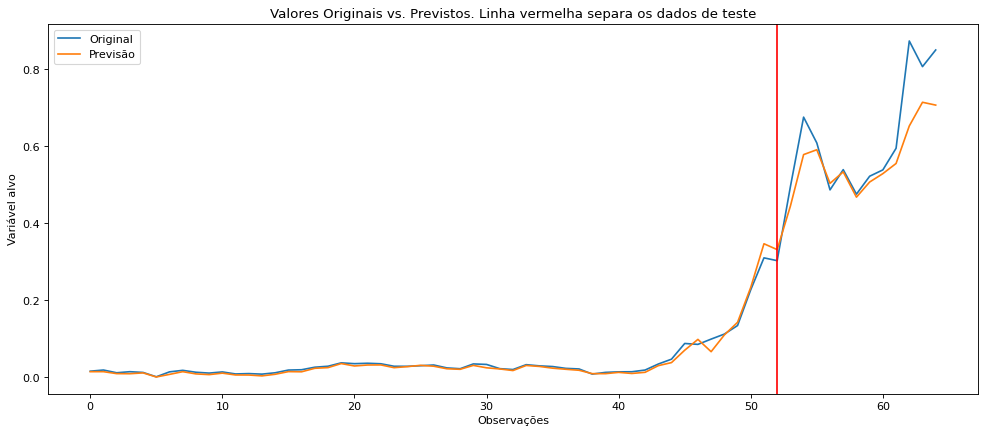

In [8]:

df_XY_03,train_data_03,test_data_03 = load_and_prepare_data()

# Same value of the previous test
time_steps = 50

# Prepating the train data frame
trainX_03, trainY_03 = get_XY(train_data_03, time_steps)

# Prepating the test data frame
testX_03, testY_03 = get_XY(test_data_03, time_steps)

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0],return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, activation=activation[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_03 = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model_03.fit(trainX_03, trainY_03, validation_data=(testX_03, testY_03), epochs=20, batch_size=32, verbose=2)


# make predictions
train_predict_03 = model_03.predict(trainX_03)
test_predict_03 = model_03.predict(testX_03)
# Mean square error
print_error(trainY_03, testY_03, train_predict_03, test_predict_03)


# predicting
predicted_03 = model_03.predict(trainX_03)
predicted_prices_03 = scaler.inverse_transform(predicted_03)
actual_prices_03 = scaler.inverse_transform(testY.reshape(-1, 1))

# Plot the result
plot_result(trainY_03, testY_03, train_predict_03, test_predict_03)

# Quarta análise
- modelo04, com 4 blocos de LSTM

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 4s - 2s/step - loss: 0.0036 - val_loss: 0.2119
Epoch 2/20
2/2 - 1s - 388ms/step - loss: 0.0017 - val_loss: 0.1349
Epoch 3/20
2/2 - 0s - 73ms/step - loss: 0.0017 - val_loss: 0.0878
Epoch 4/20
2/2 - 0s - 54ms/step - loss: 5.8924e-04 - val_loss: 0.0445
Epoch 5/20
2/2 - 0s - 68ms/step - loss: 5.4012e-04 - val_loss: 0.0132
Epoch 6/20
2/2 - 0s - 69ms/step - loss: 2.0243e-04 - val_loss: 0.0089
Epoch 7/20
2/2 - 0s - 58ms/step - loss: 5.5335e-04 - val_loss: 0.0156
Epoch 8/20
2/2 - 0s - 73ms/step - loss: 2.7284e-04 - val_loss: 0.0395
Epoch 9/20
2/2 - 0s - 56ms/step - loss: 3.5515e-04 - val_loss: 0.0520
Epoch 10/20
2/2 - 0s - 71ms/step - loss: 3.1261e-04 - val_loss: 0.0540
Epoch 11/20
2/2 - 0s - 74ms/step - loss: 7.6920e-04 - val_loss: 0.0488
Epoch 12/20
2/2 - 0s - 52ms/step - loss: 3.6911e-04 - val_loss: 0.0463
Epoch 13/20
2/2 - 0s - 71ms/step - loss: 2.5800e-04 - val_loss: 0.0355
Epoch 14/20
2/2 - 0s - 68ms/step - loss: 1.0556e-04 - val_loss: 0.0231
Epoch 15/20
2/2 - 0s - 74ms/step - loss

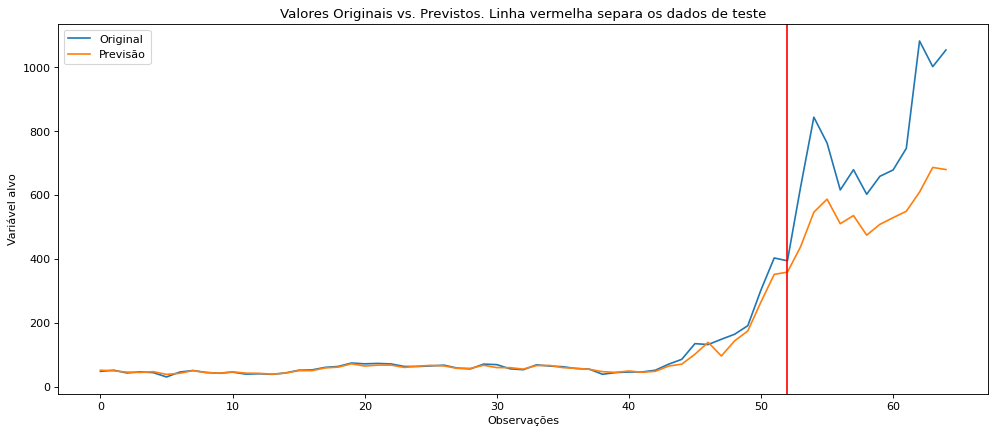

In [23]:

df_XY_04,train_data_04,test_data_04 = load_and_prepare_data()

# Same value of the previous test
time_steps = 50

# Prepating the train data frame
trainX_04, trainY_04 = get_XY(train_data_04, time_steps)

# Prepating the test data frame
testX_04, testY_04 = get_XY(test_data_04, time_steps)

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0],return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, activation=activation[1],return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, activation=activation[1],return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, activation=activation[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_04 = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model_04.fit(trainX_04, trainY_04, validation_data=(testX_04, testY_04), epochs=20, batch_size=32, verbose=2)


# make predictions
train_predicted_04 = model_04.predict(trainX_04)
test_predict_04 = model_04.predict(testX_04)

# predicting
predicted_train_prices_04 = scaler.inverse_transform(train_predicted_04)
predicted_test_prices_04 = scaler.inverse_transform(test_predict_04)
current_train_prices_04 = scaler.inverse_transform(trainY_04.reshape(-1, 1))
current_test_prices_04 = scaler.inverse_transform(testY_04.reshape(-1, 1))

# Mean square error
print_error(current_train_prices_04, current_test_prices_04, predicted_train_prices_04, predicted_test_prices_04)

# Plot the result
plot_result(current_train_prices_04, current_test_prices_04, predicted_train_prices_04, predicted_test_prices_04)